## **Projeto 01 - Análise dos Dados do Airbnb - [Buenos Aires, Argentina](https://data.insideairbnb.com/argentina/ciudad-aut%C3%B3noma-de-buenos-aires/buenos-aires/2024-06-29/visualisations/listings.csv)**
###### **Data Science na Prática 4.0** [sigmoidal.ai](https://sigmoidal.ai)
*by[Jhefferson Z. Andreatta](https://www.linkedin.com/in/e-jhefferson-zardin-andreatta-8ab67723a/)*

---

A [Airbnb](https://www.airbnb.com.br/) é uma empresa americana de hospedagem fundada em 2008 por Brian Chesky, Joe Gebbia e Nathan Blecharczyk. Ela funciona como intermediária, cobrando uma taxa tanto dos anfitriões quanto dos hóspedes, através do site ou aplicativo. Os anfitriões podem listar suas propriedades, enquanto os hóspedes podem pesquisar e reservar acomodações de maneira fácil e segura.

Além de hospedagem, a Airbnb expandiu seus serviços para incluir experiências, onde os anfitriões podem oferecer atividades como tours guiados, workshops de culinária e outras atividades locais. A empresa teve um impacto significativo na indústria de hospitalidade, competindo com hotéis tradicionais e proporcionando uma alternativa mais autêntica e muitas vezes mais econômica para os viajantes.

No final de 2018, a startup fundada há 10 anos já havia **hospedado mais de 300 milhões** de pessoas ao redor do mundo, número que lhe deu o reconhecimento de ser a **maior empresa hoteleira da atualidade, sem possuir um único hotel**!

Em dezembro de 2020, a Airbnb abriu seu capital, com uma oferta pública inicial (IPO) que avaliou a empresa em aproximadamente 47 bilhões de dólares. Na data da realização desta análise, o valor de mercado da empresa é de aproximadamente 93 bilhões de dólares.

## Obtenção dos Dados

Uma das iniciativas do Airbnb é disponibilizar dados do site para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

**Para esta análise, usaremos o arquivo `listings.csv` - *Summary information and metrics for listings in... (good for visualisations)*, onde neste *notebook* iremos analisar os dados brutos e extrair insights pertinentes.**

Importante: O portal está em constante evolução, e em determinado momento, pode ser que o [conjunto de dados](https://data.insideairbnb.com/argentina/ciudad-aut%C3%B3noma-de-buenos-aires/buenos-aires/2024-06-29/visualisations/listings.csv) exato utilizado neste notebook não esteja mais disponível, o que quebraria nosso código.

#### *Vamos ao projeto!!!*

In [1]:
# Instalando pacotes necessários
!pip install pandas seaborn yfinance matplotlib folium -q

In [2]:
# Importar os pacotes necessários
import folium
import pandas as pd
import seaborn as sns
import yfinance as yf
import matplotlib.pyplot as plt

from datetime import datetime

# Para exibir gráficos inline no Jupyter Notebook
%matplotlib inline

In [3]:
# Importar o arquivo listings.csv para um DataFrame
DATA_PATH = 'https://data.insideairbnb.com/argentina/ciudad-aut%C3%B3noma-de-buenos-aires/buenos-aires/2024-06-29/visualisations/listings.csv'
df = pd.read_csv(DATA_PATH)

## Análise dos Dados

In [4]:
# Iniciar análise, verificando nosso 'dataset' analisando as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,11508,Amazing Luxurious Apt-Palermo Soho,42762,Candela,NaN,Palermo,-34.58184,-58.42415,Entire home/apt,61788.0,3,41,2024-04-22,0.28,1,338,5,NaN
1,186005,Modern apartment in Downtown Buenos Aires,893209,Victoria,NaN,Retiro,-34.59804,-58.37688,Entire home/apt,63737.0,7,85,2023-10-28,0.56,4,293,8,NaN
2,14222,"RELAX IN HAPPY HOUSE - PALERMO, BUENOS AIRES",87710233,María,NaN,Palermo,-34.58617,-58.41036,Entire home/apt,16032.0,7,119,2024-06-12,0.82,7,13,11,NaN
3,188154,At the heart of San Telmo Double,906277,Magdalena,NaN,San Telmo,-34.62063,-58.36967,Private room,22763.0,2,80,2024-03-09,0.53,6,330,7,NaN
4,48535,Elegant apartment in downtown Bs.As,221044,Florencia,NaN,Retiro,-34.59620,-58.37529,Entire home/apt,45526.0,90,0,NaN,NaN,1,364,0,NaN


**Dicionário das variáveis**

* `id` - identificador único de cada imóvel
* `name` - nome do imóvel anunciado
* `host_id` - identificador único de cada usuário
* `host_name` - nome do usuário
* `neighbourhood_group` - indica o grupo de bairros
* `neighbourhood` - indica qual a vizinhança
* `latitude` - coordenada da latitude do imóvel
* `longitude` - coordenada da longitude do imóvel
* `room_type` - tipo de imóvel ofertado
* `price` - valor da diária
* `minimum_nights` - quantidade mínima de noites que os proprietários alugam
* `number_of_reviews` - número de avaliações que a propriedade recebeu
* `last_review` - data da última avaliação
* `reviews_per_month` - quantidade de avaliações recebidas por mês
* `calculated_host_listings_count` - quantidade de imóveis que um mesmo anfitrião possui anunciados
* `availability_365` - número de dias de disponibilidade dentro de 365 dias
* `number_of_reviews_ltm` - quantidade de avaliações nos últimos 12 meses
* `license` - número de registro do imóvel

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [5]:
# Identificar o volume de dados e a forma do DataFrame
print('Forma do DataFrame:')
print('---> {} linhas.'.format(df.shape[0]))
print('---> {} colunas.'.format(df.shape[1]))

# Verificar os tipos de variáveis
df.dtypes

Forma do DataFrame:
---> 37035 linhas.
---> 18 colunas.


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [6]:
# Ordena em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum().sort_values(ascending=False) / df.shape[0]) * 100

neighbourhood_group               100.000000
license                            98.838936
reviews_per_month                  19.643580
last_review                        19.643580
price                               8.181450
host_name                           0.005400
name                                0.000000
id                                  0.000000
neighbourhood                       0.000000
host_id                             0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
number_of_reviews                   0.000000
minimum_nights                      0.000000
calculated_host_listings_count      0.000000
availability_365                    0.000000
number_of_reviews_ltm               0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?**

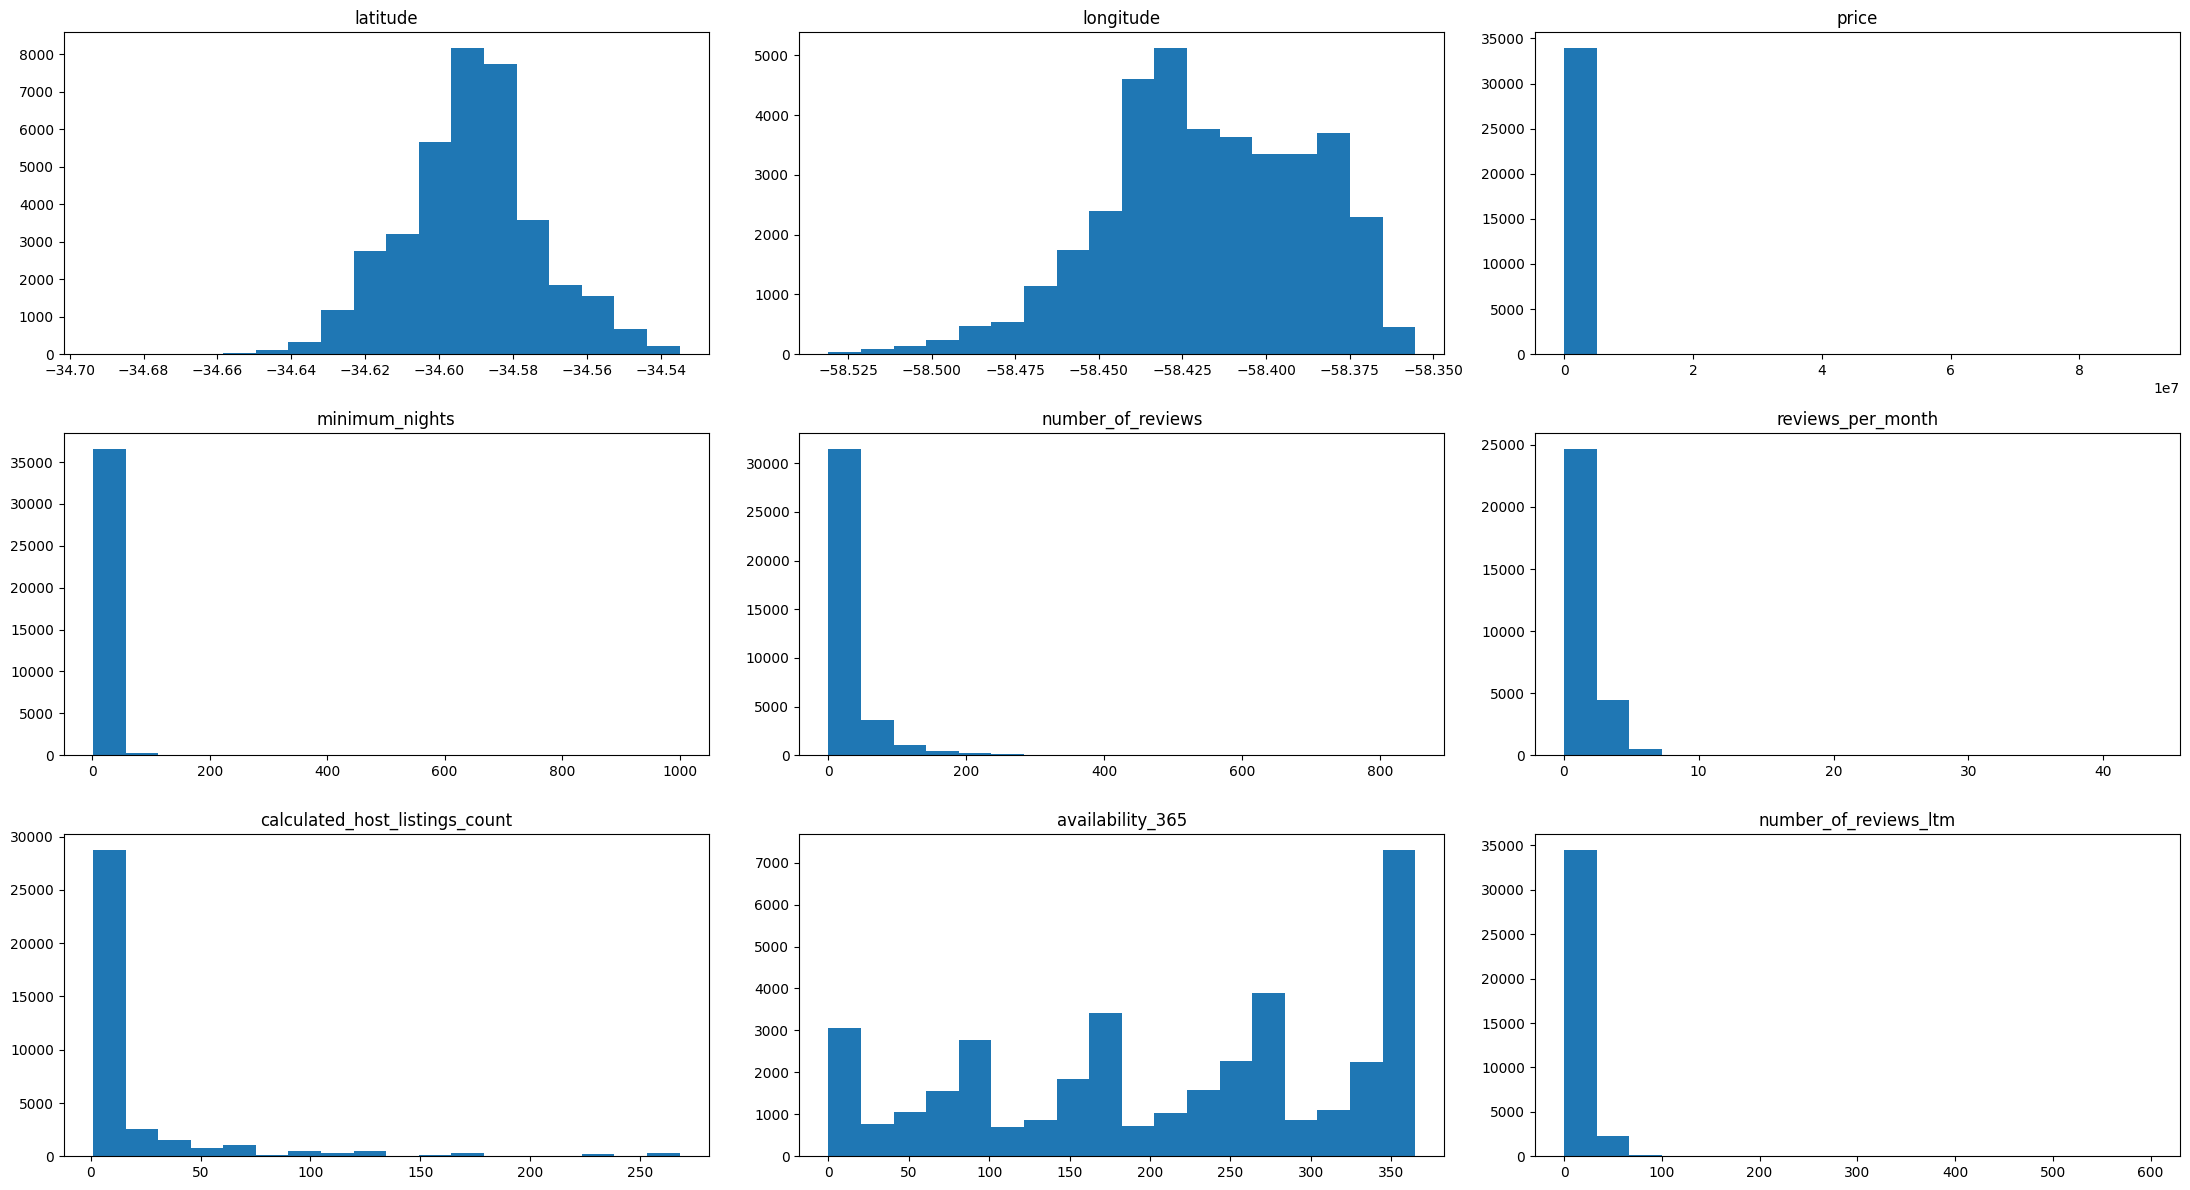

In [7]:
# Plotar o histograma das variáveis numéricas
df.hist(column=['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 
                'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 
                'number_of_reviews_ltm'], bins=18, figsize=(22, 12), grid=False)
plt.tight_layout()
plt.show()

**Antes da verificação dos *outliers*, vamos converter os valores da variável `price` de pesos argentinos para dólares.**

* Usaremos a biblioteca `yfinance` para importar a cotação atual.

In [8]:
# Importando a cotação atual da moeda 'ARSUSD=X' com Yahoo Finance
arsusd = yf.download('ARSUSD=X', start=datetime.now())['Adj Close']
arsusd = arsusd.iloc[0]

[*********************100%%**********************]  1 of 1 completed


In [9]:
# Realizando cópia do DataFrame original
df_clean = df.copy()

# Converter o preço para dólares
df_clean['price'] = df_clean['price'] * arsusd

### **Q4. Verificar os *outliers* presentes no `dataset`.**

In [10]:
# Ver resumo estatístico das variáveis numéricas
df_clean[['price', 'minimum_nights', 'availability_365', 'number_of_reviews', 
            'reviews_per_month', 'number_of_reviews_ltm', 'calculated_host_listings_count']].describe()

,price,minimum_nights,availability_365,number_of_reviews,reviews_per_month,number_of_reviews_ltm,calculated_host_listings_count
count,34005.000000,37035.000000,37035.000000,37035.000000,29760.000000,37035.000000,37035.000000
mean,71.533013,5.553665,212.046848,23.614041,1.346114,9.843391,18.405697
std,995.132274,23.318454,117.829793,40.531072,1.328470,14.253768,41.031330
min,0.281385,1.000000,0.000000,0.000000,0.010000,0.000000,1.000000
25%,24.635281,1.000000,104.000000,1.000000,0.380000,0.000000,1.000000
50%,34.233766,2.000000,236.000000,8.000000,0.970000,4.000000,2.000000
75%,49.270563,3.000000,328.000000,29.000000,1.950000,14.000000,13.000000
max,98541.746661,1000.000000,365.000000,851.000000,43.520000,600.000000,268.000000


Após observar a distribuição do histograma e o resumo estatístico, é possível verificar as seguintes situações:

* As colunas `neighbourhood_group` e `license` têm mais de 98% de seus dados ausentes.
* Existem possíveis outliers nas variáveis `price` e `minimum_nights`.

In [11]:
# Excluir as colunas 'neighbourhood_group' e 'license'
df_clean.drop(columns=['neighbourhood_group', 'license'], inplace=True)

In [12]:
# Calcular a porcentagem de exclusão
print('Esta exclusão representou {:.4f}% do DataFrame'.format(
    df_clean[(df_clean['price'].isnull()) & 
                (df_clean['availability_365'] == 0) & 
                (df_clean['number_of_reviews'] == 0)].shape[0] / df.shape[0] * 100
))

# Exclusão dos imóveis que não têm preço, nunca receberam avaliação e têm zero dias disponíveis
df_clean.drop(
    df_clean[(df_clean['price'].isnull()) & 
                (df_clean['availability_365'] == 0) & 
                (df_clean['number_of_reviews'] == 0)].index, 
    axis=0, 
    inplace=True
)

Esta exclusão representou 2.4409% do DataFrame


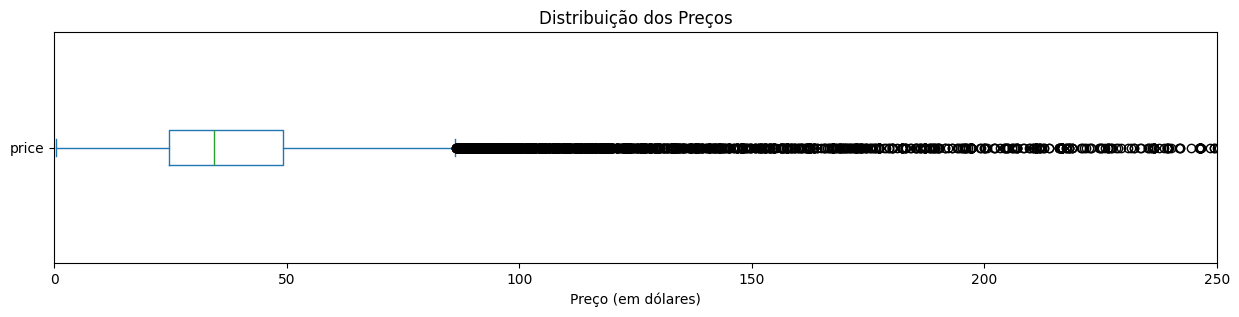

Preço: valores acima de 250 dólares
389 entradas
1.0766%


In [13]:
# Plotar boxplot dos preços
df_clean['price'].plot(kind='box', vert=False, xlim=(0, 250), figsize=(15, 3))
plt.title('Distribuição dos Preços')
plt.xlabel('Preço (em dólares)')
plt.show()

# Verificar preços acima de 250 dólares
print('Preço: valores acima de 250 dólares')
print("{} entradas".format(len(df_clean[df_clean['price'] > 250])))
print("{:.4f}%".format((len(df_clean[df_clean['price'] > 250]) / df_clean.shape[0]) * 100))

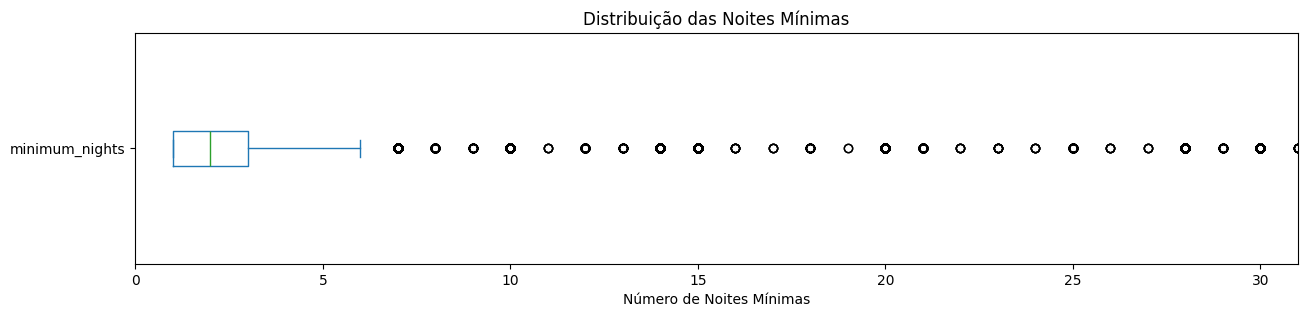

Minimum Nights: valores acima de 31 dias
421 entradas
1.1652%


In [14]:
# Plotar boxplot das noites mínimas
df_clean['minimum_nights'].plot(kind='box', vert=False, xlim=(0, 31), figsize=(15, 3))
plt.title('Distribuição das Noites Mínimas')
plt.xlabel('Número de Noites Mínimas')
plt.show()

# Verificar valores acima de 31 dias para 'minimum_nights'
print('Minimum Nights: valores acima de 31 dias')
print("{} entradas".format(len(df_clean[df_clean['minimum_nights'] > 31])))
print("{:.4f}%".format((len(df_clean[df_clean['minimum_nights'] > 31]) / df_clean.shape[0]) * 100))

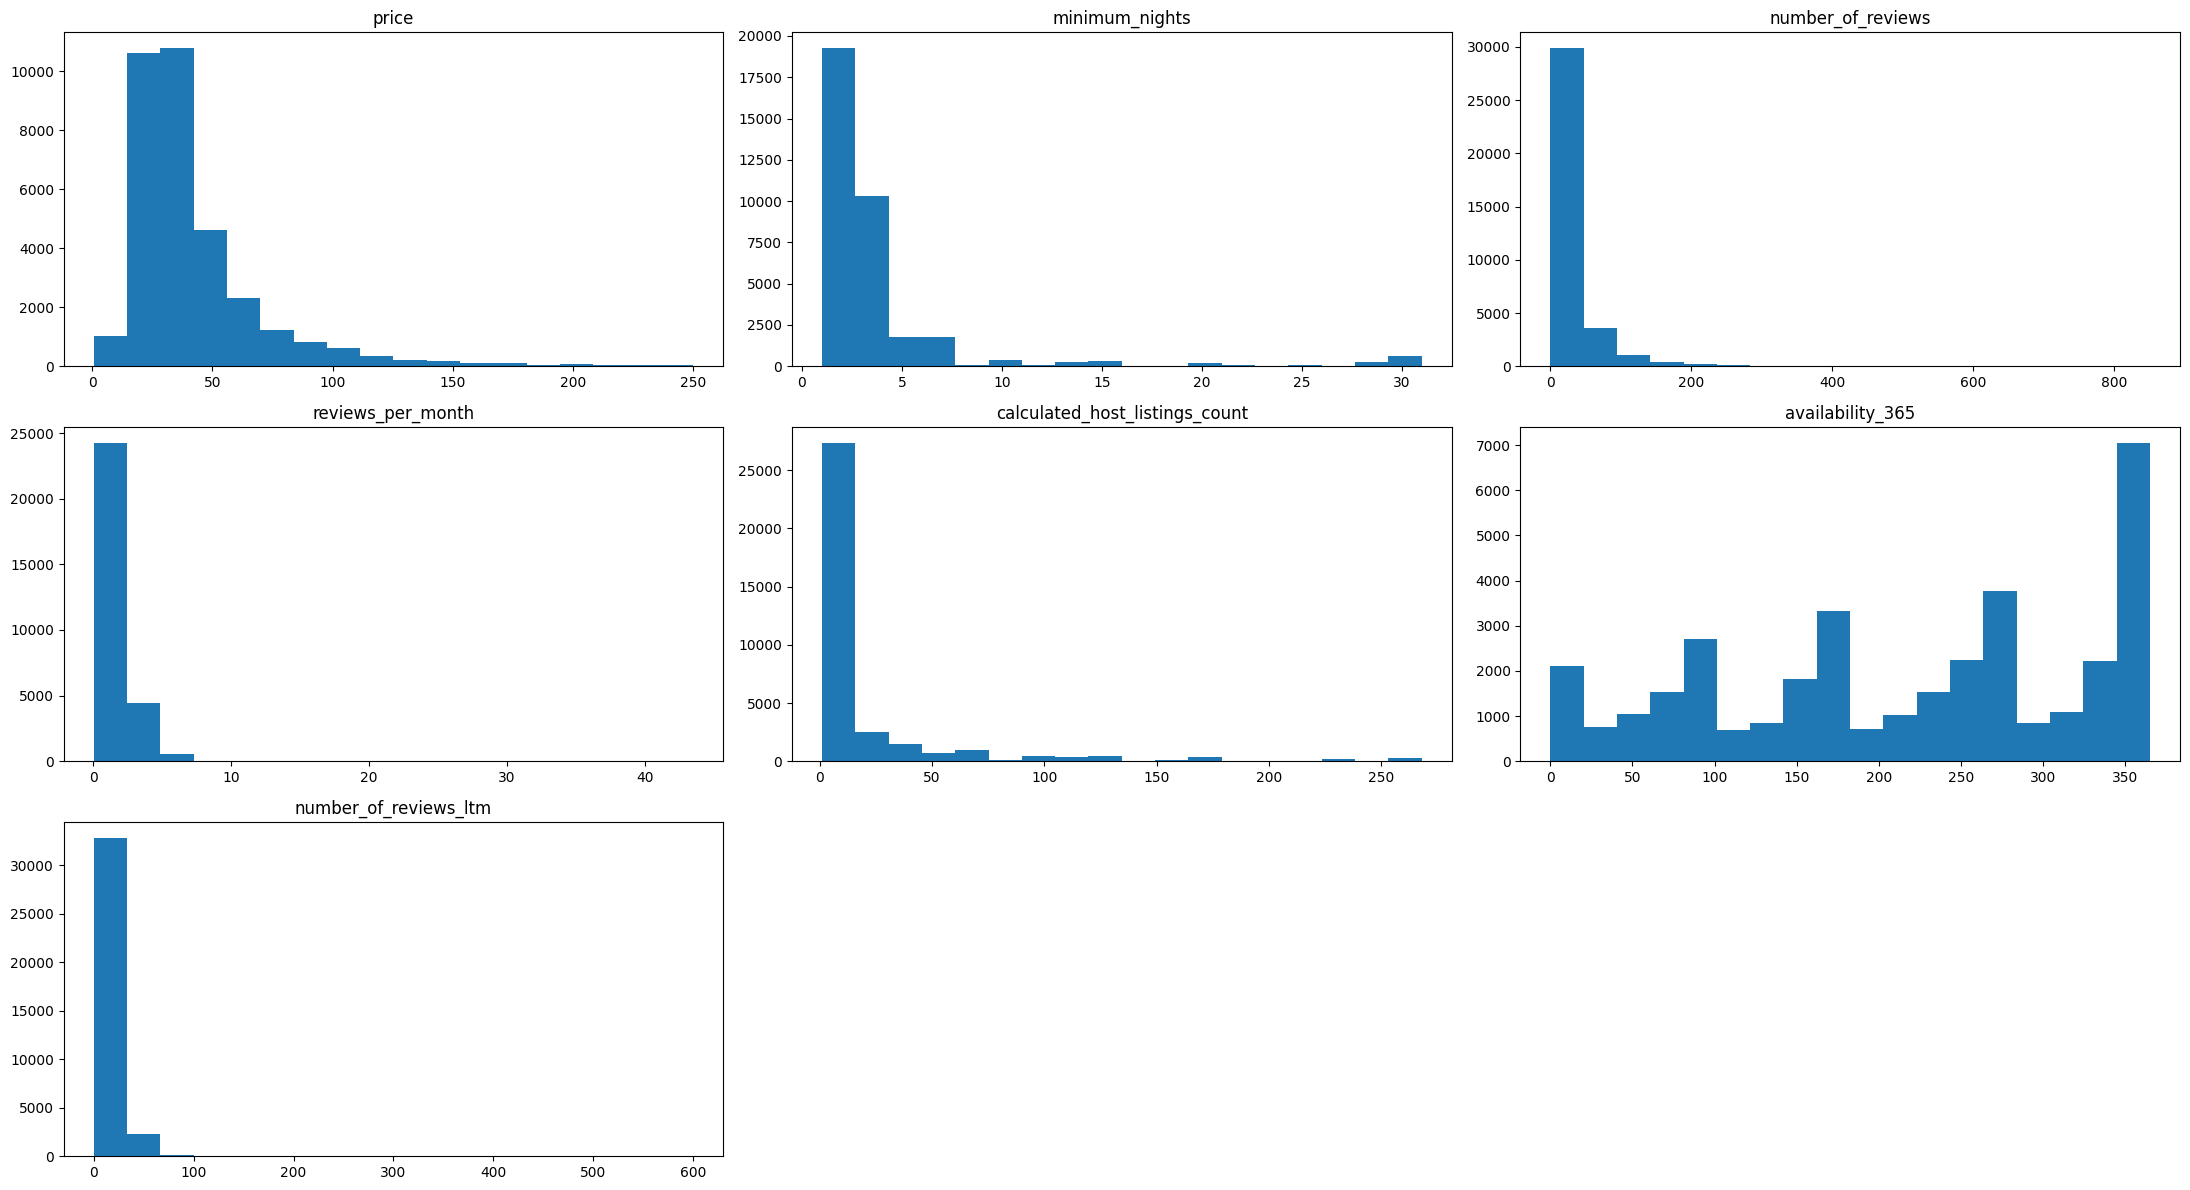

In [15]:
# Exclusão das linhas com preço maior que 250 dólares
df_clean.drop(df_clean[df_clean['price'] > 250].index, axis=0, inplace=True)

# Exclusão das linhas com noites mínimas maiores que 31 dias
df_clean.drop(df_clean[df_clean['minimum_nights'] > 31].index, axis=0, inplace=True)

# Histograma das variáveis numéricas após a exclusão dos outliers
df_clean.hist(column=['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
                        'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm'], 
                        bins=18, figsize=(22, 12), grid=False)
plt.tight_layout()
plt.show()

### **Q5. Qual a média dos preços de aluguel?**

In [16]:
# Ver a média da coluna 'price'
print('Média de preços em Buenos Aires é de {:.2f} dólares.'.format(df_clean['price'].mean()))

# Ver a mediana de preços em Buenos Aires por bairro, ordenado da maior para a menor
print('Mediana de preços em Buenos Aires por bairro, ordenado da maior à menor:')
print(df_clean.groupby('neighbourhood')['price'].median().sort_values(ascending=False))

Média de preços em Buenos Aires é de 42.51 dólares.
Mediana de preços em Buenos Aires por bairro, ordenado da maior à menor:
neighbourhood
Puerto Madero        94.176407
Versalles            38.857684
Palermo              37.445887
Colegiales           37.308442
Recoleta             35.948052
Villa Lugano         35.942100
Belgrano             34.489177
Retiro               33.149351
Nuñez                31.670996
San Telmo            31.533550
Barracas             31.533550
Floresta             31.533550
San Nicolas          31.030303
Villa Devoto         30.055195
Agronomia            29.562771
Monserrat            29.562771
Boca                 29.562771
Villa Urquiza        29.562771
Parque Patricios     29.562771
Parque Chacabuco     28.577381
Villa Crespo         28.576840
Caballito            28.281385
Almagro              28.138528
Villa Luro           27.591991
Villa Pueyrredon     27.591991
Mataderos            27.591991
Saavedra             27.591991
Chacarita            27.

### **Q6. Qual a correlação existente entre as variáveis**

In [17]:
# Criar uma matriz de correlação
df_corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
                    'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].corr()

# Mostrar a matriz de correlação
print('Matriz de Correlação:')
df_corr

Matriz de Correlação:


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
price,1.000000,0.025091,-0.007994,-0.075691,0.087933,0.066406,-0.044804
minimum_nights,0.025091,1.000000,-0.092327,-0.223147,-0.052897,-0.038668,-0.164408
number_of_reviews,-0.007994,-0.092327,1.000000,0.445916,-0.006851,0.020835,0.649523
reviews_per_month,-0.075691,-0.223147,0.445916,1.000000,0.064791,0.023951,0.817948
calculated_host_listings_count,0.087933,-0.052897,-0.006851,0.064791,1.000000,0.151415,0.050697
availability_365,0.066406,-0.038668,0.020835,0.023951,0.151415,1.000000,0.028294
number_of_reviews_ltm,-0.044804,-0.164408,0.649523,0.817948,0.050697,0.028294,1.000000


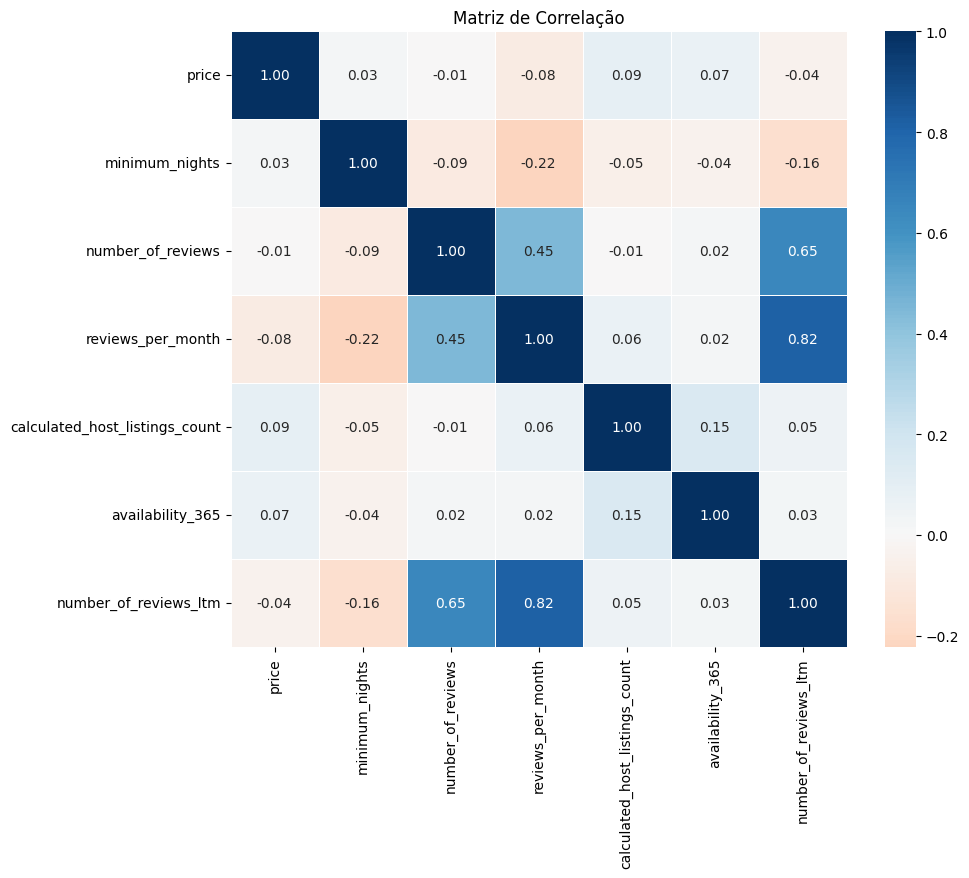

In [18]:
# Plotar um heatmap a partir das correlações
plt.figure(figsize=(10, 8))  # Ajustar o tamanho da figura para melhor visualização
sns.heatmap(df_corr, annot=True, fmt='.2f', cmap='RdBu', 
            center=0,  # Ajusta a coloração para que zero esteja no centro do mapa de cores
            linewidths=0.5, linecolor='white', square=True)
plt.title('Matriz de Correlação')
plt.show()

### **Q7. Qual o tipo de imóvel mais alugado no Airbnb?**

In [19]:
# Mostrar a quantidade de cada tipo de imóvel disponível
print('Imóveis disponíveis para aluguel:')
print(df_clean['room_type'].value_counts().to_string())

Imóveis disponíveis para aluguel:
room_type
Entire home/apt    32298
Private room        2719
Shared room          245
Hotel room            76


In [20]:
# mostrar a porcentagem de cada tipo de imóvel disponível
print('Porcentagens de imóveis disponíveis para aluguel: {}'.format(((
                                        df_clean['room_type'].value_counts() / df_clean.shape[0]) * 100).to_string()))

# Mostrar a porcentagem de cada tipo de imóvel disponível
print('Porcentagem de imóveis disponíveis para aluguel: {}'.format(((
                                        df_clean['room_type'].value_counts() / df_clean.shape[0]) * 100).to_string()))

Porcentagens de imóveis disponíveis para aluguel: room_type
Entire home/apt    91.397363
Private room        7.694267
Shared room         0.693305
Hotel room          0.215066
Porcentagem de imóveis disponíveis para aluguel: room_type
Entire home/apt    91.397363
Private room        7.694267
Shared room         0.693305
Hotel room          0.215066


### **Q8. Qual a localidade mais cara do dataset?**

In [21]:
# Ver a média dos preços por bairro
print('Média de preço em cada bairro: {}'.format(
                                        df_clean.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)))

Média de preço em cada bairro: neighbourhood
Puerto Madero        99.753095
Palermo              47.438358
Colegiales           46.105369
Recoleta             45.494841
Versalles            45.340233
Retiro               43.828657
Belgrano             43.723249
Nuñez                42.729079
San Telmo            40.235613
Floresta             40.184888
Parque Avellaneda    39.280621
Villa Devoto         39.109101
Barracas             38.864730
Villa Santa Rita     38.282074
San Nicolas          37.769845
Villa Del Parque     36.513505
Parque Patricios     35.357936
Chacarita            35.315476
Boca                 35.247997
Monserrat            35.181193
Villa Crespo         35.103114
Villa Urquiza        34.850185
Coghlan              34.421044
Mataderos            34.203036
Villa Lugano         34.141234
Caballito            34.108032
Saavedra             33.714295
Parque Chacabuco     33.569159
Velez Sarsfield      32.883168
Villa Ortuzar        32.825974
Almagro              32.6

In [22]:
# Ver o valor máximo dos preços por bairro
print('Valor máximo em cada bairro: {}'.format(
                                        df_clean.groupby('neighbourhood')['price'].max().sort_values(ascending=False)))

Valor máximo em cada bairro: neighbourhood
Balvanera            249.951298
Belgrano             249.448052
Retiro               248.463203
Palermo              246.639610
Puerto Madero        246.353896
Monserrat            246.353896
Recoleta             246.353896
San Nicolas          246.353896
San Telmo            242.126623
Almagro              236.500000
Parque Patricios     233.681818
Colegiales           232.272727
Caballito            222.990260
Villa Crespo         222.535714
Villa Del Parque     221.861472
Villa Urquiza        218.201298
Barracas             216.792208
Villa Ortuzar        216.230519
San Cristobal        213.974026
Chacarita            210.600649
Constitucion         202.385281
Coghlan              197.083333
Nuñez                197.083333
Flores               162.337662
Boca                 161.608225
Parque Avellaneda    159.075757
Villa Devoto         158.401515
Parque Chacabuco     149.545454
Saavedra             147.812770
Villa Santa Rita     147.8127

In [ ]:
# Criar um mapa centrado na média das coordenadas
map_center = [df_clean['latitude'].mean(), df_clean['longitude'].mean()]
mymap = folium.Map(location=map_center, zoom_start=12)

# Adicionar pontos ao mapa
for _, row in df_clean.iterrows():
    popup_text = f"""
    <b>Nome:</b> {row['name']}<br>
    <b>Tipo:</b> {row['room_type']}<br>
    <b>Anfitrião:</b> {row['host_name']}<br>
    <b>Preço:</b> ${row['price']:.2f}<br>
    <b>Latitude:</b> {row['latitude']}<br>
    <b>Longitude:</b> {row['longitude']}
    """
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=0.5,  # Tamanho do ponto
        color='red',  # Cor do ponto
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        popup=folium.Popup(popup_text, max_width=300)
    ).add_to(mymap)

# Salvar o mapa em um arquivo HTML
mymap.save('map_buenos_aires.html')

# Exibir o mapa no Jupyter Notebook (se estiver usando)
mymap

### **Q9. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [24]:
# Ver a média da coluna 'minimum_nights'
print('A média da coluna "minimum_nights" é: {:.2f} dias disponíveis para aluguel'.format(
                                                                                    df_clean['minimum_nights'].mean()))

A média da coluna "minimum_nights" é: 3.62 dias disponíveis para aluguel


## Conclusão

Esta análise, embora limitada, revelou informações significativas sobre os dados do Airbnb em Buenos Aires. Mesmo com um conjunto de dados relativamente pequeno, observamos a presença de outliers em várias variáveis, que podem influenciar a precisão dos resultados.

Em particular, identificamos outliers nas variáveis de preço e número mínimo de noites de aluguel. Algumas localidades apresentaram poucos imóveis disponíveis para aluguel, e a quantidade mínima de dias disponíveis para locação ultrapassou 31 dias, chegando até 1000 dias em alguns casos. Esses outliers podem distorcer as estatísticas e criar uma visão enviesada de certos atributos.

Adicionalmente, é importante ressaltar que utilizamos uma versão resumida do conjunto de dados, disponível em [listings.csv](https://data.insideairbnb.com/argentina/ciudad-aut%C3%B3noma-de-buenos-aires/buenos-aires/2024-06-29/visualisations/listings.csv), que é adequada para uma análise inicial. Para uma análise exploratória mais completa e detalhada, recomenda-se o uso do [conjunto de dados](https://data.insideairbnb.com/argentina/ciudad-aut%C3%B3noma-de-buenos-aires/buenos-aires/2024-06-29/data/listings.csv.gz) completo, que oferece uma visão mais abrangente e detalhada das informações.